In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


#### Reading file and checking head and shape

In [2]:
df=pd.read_csv('happiness_score_dataset.csv')

In [3]:
df.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [4]:
def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_max]
 
df.style.apply(highlight_max)

In [5]:
df.shape

(158, 12)

#### Checking for missing values

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

#### Finding number of different strings (countries and region)

In [7]:
for col in df.select_dtypes(object):
    print(col, df[col].nunique())

Country 158
Region 10


In [8]:
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

#### Checking correlation between variables

In [9]:
df.corr()

Happiness Rank  Happiness Score  \
Happiness Rank                       1.000000        -0.992105   
Happiness Score                     -0.992105         1.000000   
Standard Error                       0.158516        -0.177254   
Economy (GDP per Capita)            -0.785267         0.780966   
Family                              -0.733644         0.740605   
Health (Life Expectancy)            -0.735613         0.724200   
Freedom                             -0.556886         0.568211   
Trust (Government Corruption)       -0.372315         0.395199   
Generosity                          -0.160142         0.180319   
Dystopia Residual                   -0.521999         0.530474   

                               Standard Error  Economy (GDP per Capita)  \
Happiness Rank                       0.158516                 -0.785267   
Happiness Score                     -0.177254                  0.780966   
Standard Error                       1.000000                 -0.217651   
Economy (GDP per Capita)            -0.217651                  1.000000   
Family                              -0.120728                  0.645299   
Health (Life Expectancy)            -0.310287                  0.816478   
Freedom                             -0.129773                  0.370300   
Trust (Government Corruption)       -0.178325                  0.307885   
Generosity                          -0.088439                 -0.010465   
Dystopia Residual                    0.083981                  0.040059   

                                 Family  Health (Life Expectancy)   Freedom  \
Happiness Rank                -0.733644                 -0.735613 -0.556886   
Happiness Score                0.740605                  0.724200  0.568211   
Standard Error                -0.120728                 -0.310287 -0.129773   
Economy (GDP per Capita)       0.645299                  0.816478  0.370300   
Family                         1.000000                  0.531104  0.441518   
Health (Life Expectancy)       0.531104                  1.000000  0.360477   
Freedom                        0.441518                  0.360477  1.000000   
Trust (Government Corruption)  0.205605                  0.248335  0.493524   
Generosity                     0.087513                  0.108335  0.373916   
Dystopia Residual              0.148117                  0.018979  0.062783   

                               Trust (Government Corruption)  Generosity  \
Happiness Rank                                     -0.372315   -0.160142   
Happiness Score                                     0.395199    0.180319   
Standard Error                                     -0.178325   -0.088439   
Economy (GDP per Capita)                            0.307885   -0.010465   
Family                                              0.205605    0.087513   
Health (Life Expectancy)                            0.248335    0.108335   
Freedom                                             0.493524    0.373916   
Trust (Government Corruption)                       1.000000    0.276123   
Generosity                                          0.276123    1.000000   
Dystopia Residual                                  -0.033105   -0.101301   

                               Dystopia Residual  
Happiness Rank                         -0.521999  
Happiness Score                         0.530474  
Standard Error                          0.083981  
Economy (GDP per Capita)                0.040059  
Family                                  0.148117  
Health (Life Expectancy)                0.018979  
Freedom                                 0.062783  
Trust (Government Corruption)          -0.033105  
Generosity                             -0.101301  
Dystopia Residual                       1.000000

<AxesSubplot:>

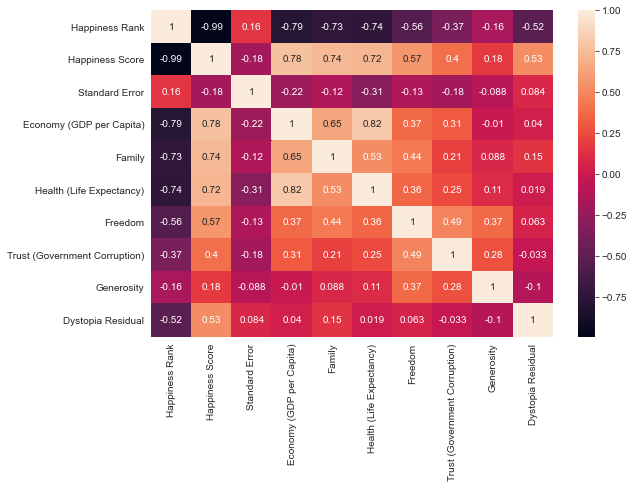

In [10]:
sns.set_style("darkgrid")
plt.figure(figsize=(9,6))
corr = df.corr()
sns.heatmap(corr, annot=True)

#### Plotting pairwise relationships in the data set

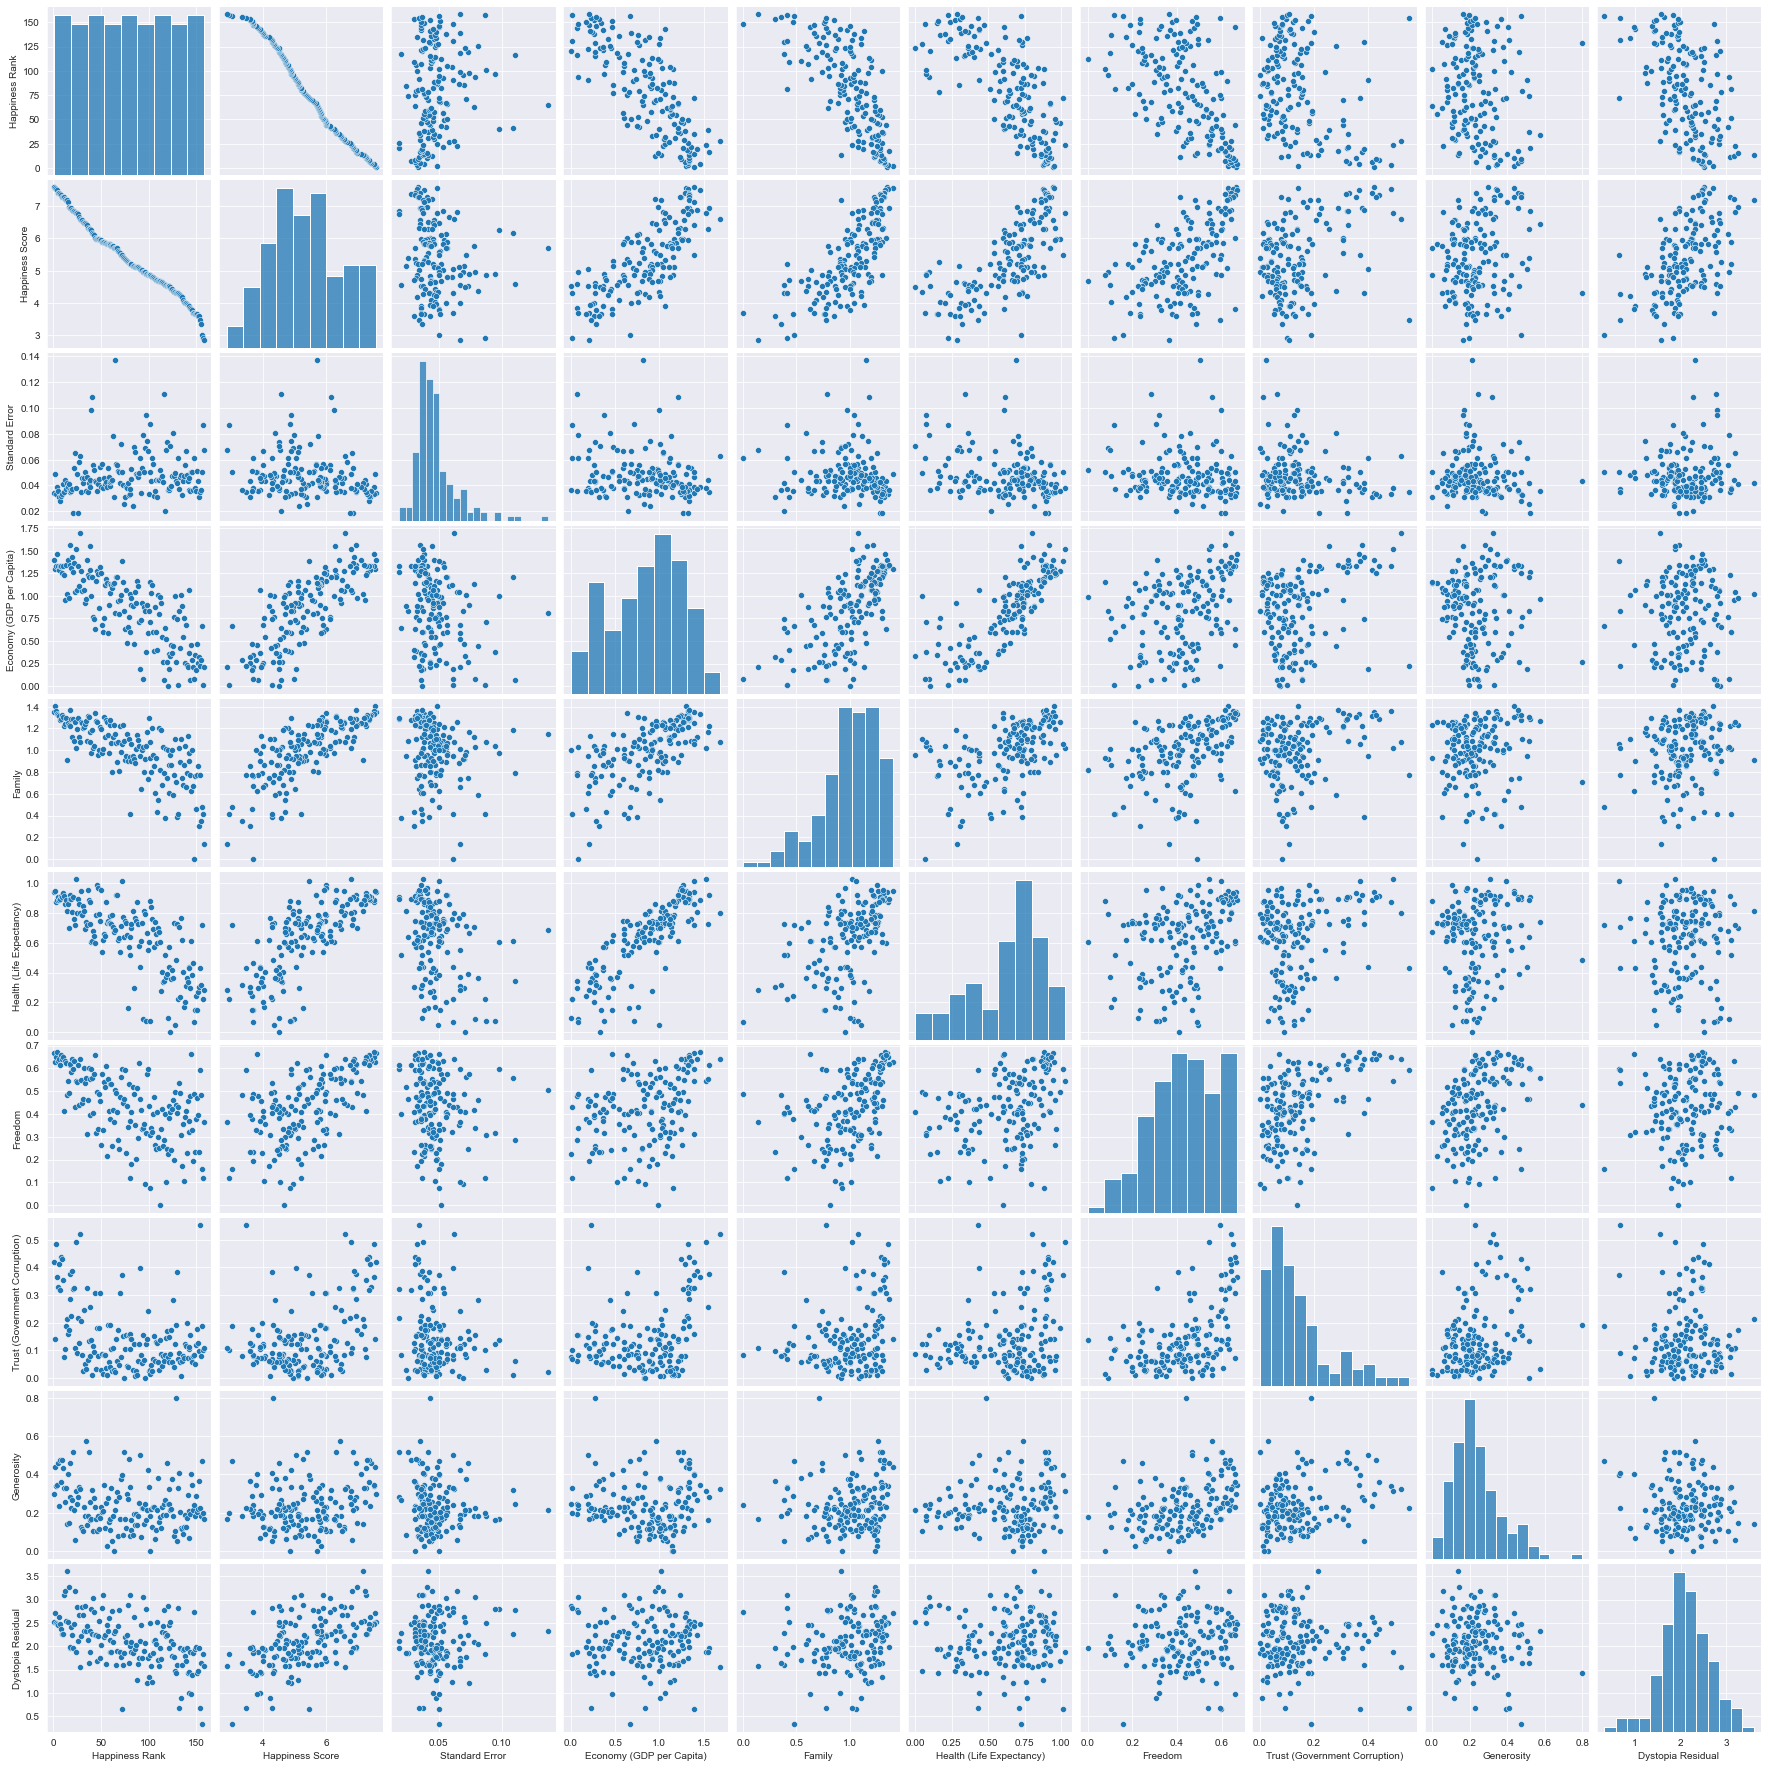

In [11]:
import seaborn as sns
sns.pairplot(df)

#### Top 10 countries for each attribute

<AxesSubplot:xlabel='Freedom', ylabel='Country'>

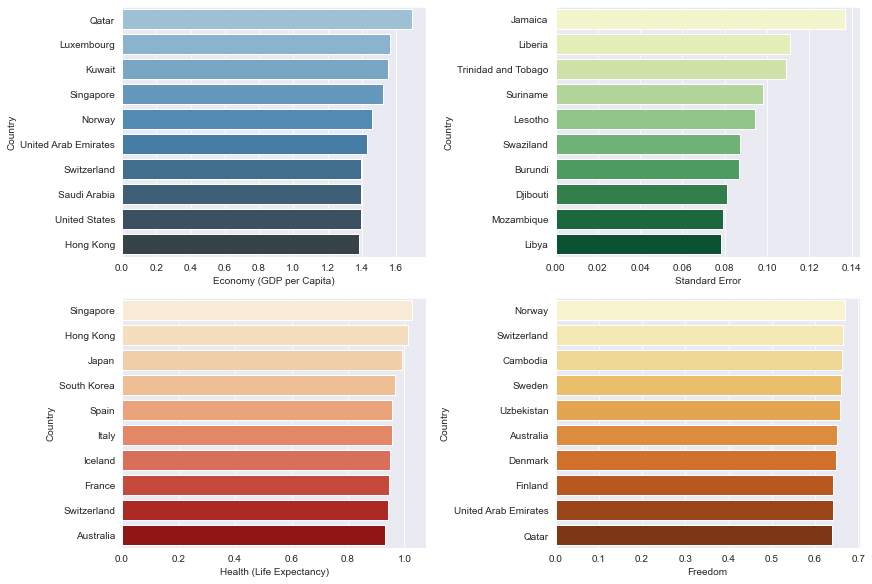

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='Economy (GDP per Capita)',y='Country',data=df.nlargest(10,'Economy (GDP per Capita)'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Standard Error' ,y='Country',data=df.nlargest(10,'Standard Error'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Health (Life Expectancy)' ,y='Country',data=df.nlargest(10,'Health (Life Expectancy)'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom' ,y='Country',data=df.nlargest(10,'Freedom'),ax=axes[1,1],palette='YlOrBr')

#### Top 5 happiest countries' scores visualized

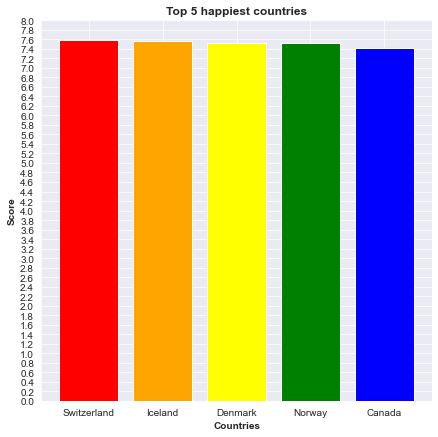

In [13]:
a = df['Country'].iloc[:5] 
b = df['Happiness Score'].iloc[:5]

ticks = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 6.4, 6.6, 6.8, 7.0, 7.2, 7.4, 7.6, 7.8, 8]
plt.figure(figsize=[7, 7])
plt.bar(a, b, color=['red', 'orange', 'yellow', 'green', 'blue'])
plt.title('Top 5 happiest countries', weight='bold')
plt.xlabel ('Countries', weight='bold')
plt.ylabel('Score', weight='bold')
plt.yticks(ticks)
plt.show()

#### Now I want to give a category to each country as High,Mid and Low according to their happiness scores.Thus we have to find out the bound in which these categories shall lie in.

In [14]:
print('max:',df['Happiness Score'].max())
print('min:',df['Happiness Score'].min())
add=df['Happiness Score'].max()-df['Happiness Score'].min()
grp=round(add/3,3)
print('range difference:',(grp))

max: 7.587000000000001
min: 2.839
range difference: 1.583


In [15]:
low=df['Happiness Score'].min()+grp
mid=low+grp

print('upper bound of Low grp',low)
print('upper bound of Mid grp',mid)
print('upper bound of High grp','max:',df['Happiness Score'].max())

upper bound of Low grp 4.422
upper bound of Mid grp 6.005
upper bound of High grp max: 7.587000000000001


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

#### Lets have a head to head comparison for the some random countries to understand why they have such a good or a band rank worldwide and get some insight.

In [18]:
data={
    'Country':['Canada','US','UK','India'],
    'Happiness Score':[7.278,6.892,7.054,4.015],
    'Economy (GDP per Capita)':[1.365,1.433,1.333,0.755],
    'Standard Error':[1.505,1.457,1.538,0.765],
    'Health (Life Expectancy)':[1.039,0.874,0.996,0.588],
    'Freedom':[0.584,0.454,0.45,0.498],
    'Generosity':[0.285,0.28,0.348,0.2],
    'Trust (Government Corruption)':[0.308,0.128,0.278,0.085]
}
d=pd.DataFrame(data)
d

Country  Happiness Score  Economy (GDP per Capita)  Standard Error  \
0  Canada            7.278                     1.365           1.505   
1      US            6.892                     1.433           1.457   
2      UK            7.054                     1.333           1.538   
3   India            4.015                     0.755           0.765   

   Health (Life Expectancy)  Freedom  Generosity  \
0                     1.039    0.584       0.285   
1                     0.874    0.454       0.280   
2                     0.996    0.450       0.348   
3                     0.588    0.498       0.200   

   Trust (Government Corruption)  
0                          0.308  
1                          0.128  
2                          0.278  
3                          0.085

### Social Support vs GDP per capita vs Healthy life expectancy

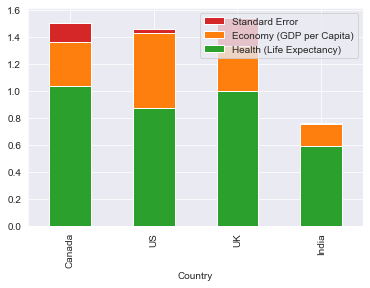

In [20]:
ax = d.plot(y="Standard Error", x="Country", kind="bar",color='C3')
d.plot(y="Economy (GDP per Capita)", x="Country", kind="bar", ax=ax, color="C1")
d.plot(y="Health (Life Expectancy)", x="Country", kind="bar", ax=ax, color="C2")

plt.show()

#### Freedom to make life choices vs Generosity vs Corruption

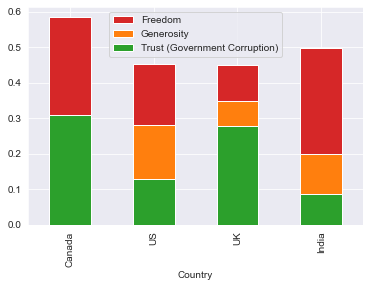

In [21]:
ax = d.plot(y="Freedom", x="Country", kind="bar",color='C3')
d.plot(y="Generosity", x="Country", kind="bar", ax=ax, color="C1",)
d.plot(y="Trust (Government Corruption)", x="Country", kind="bar", ax=ax, color="C2",)

plt.show()

### Geographic Visualization of Happiness Score

In [25]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df['Happiness Score'], 
           text = df['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)